<a href="https://colab.research.google.com/github/JiawenFu1/stat130HW/blob/main/Week03HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset


In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load the penguins dataset (using a sample dataset here since internet access is unavailable)
# Sample data for demonstration
data = {
    'species': ['Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo'],
    'flipper_length_mm': [180, 195, 185, 210, 215, 230, 235]
}
penguins = pd.DataFrame(data)

# Create histograms and add lines/rectangles for each species
fig = go.Figure()

species_list = penguins['species'].unique()

for species in species_list:
    species_data = penguins[penguins['species'] == species]
    flipper_length = species_data['flipper_length_mm']

    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    flipper_range = (flipper_length.min(), flipper_length.max())
    iqr = (flipper_length.quantile(0.25), flipper_length.quantile(0.75))
    std_dev_range = (mean - 2 * flipper_length.std(), mean + 2 * flipper_length.std())

    # Add histogram trace for the species
    fig.add_trace(
        go.Histogram(
            x=flipper_length,
            name=species,
            opacity=0.5
        )
    )

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f'{species} Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f'{species} Median', annotation_position="top left")

    # Add rectangles for range, IQR, and std deviation range
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor="yellow", opacity=0.1, line_width=0)
    fig.add_vrect(x0=iqr[0], x1=iqr[1], fillcolor="orange", opacity=0.1, line_width=0)
    fig.add_vrect(x0=std_dev_range[0], x1=std_dev_range[1], fillcolor="red", opacity=0.1, line_width=0)

# Update layout
fig.update_layout(
    title='Flipper Length Distribution by Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    barmode='overlay'
)

fig.show()

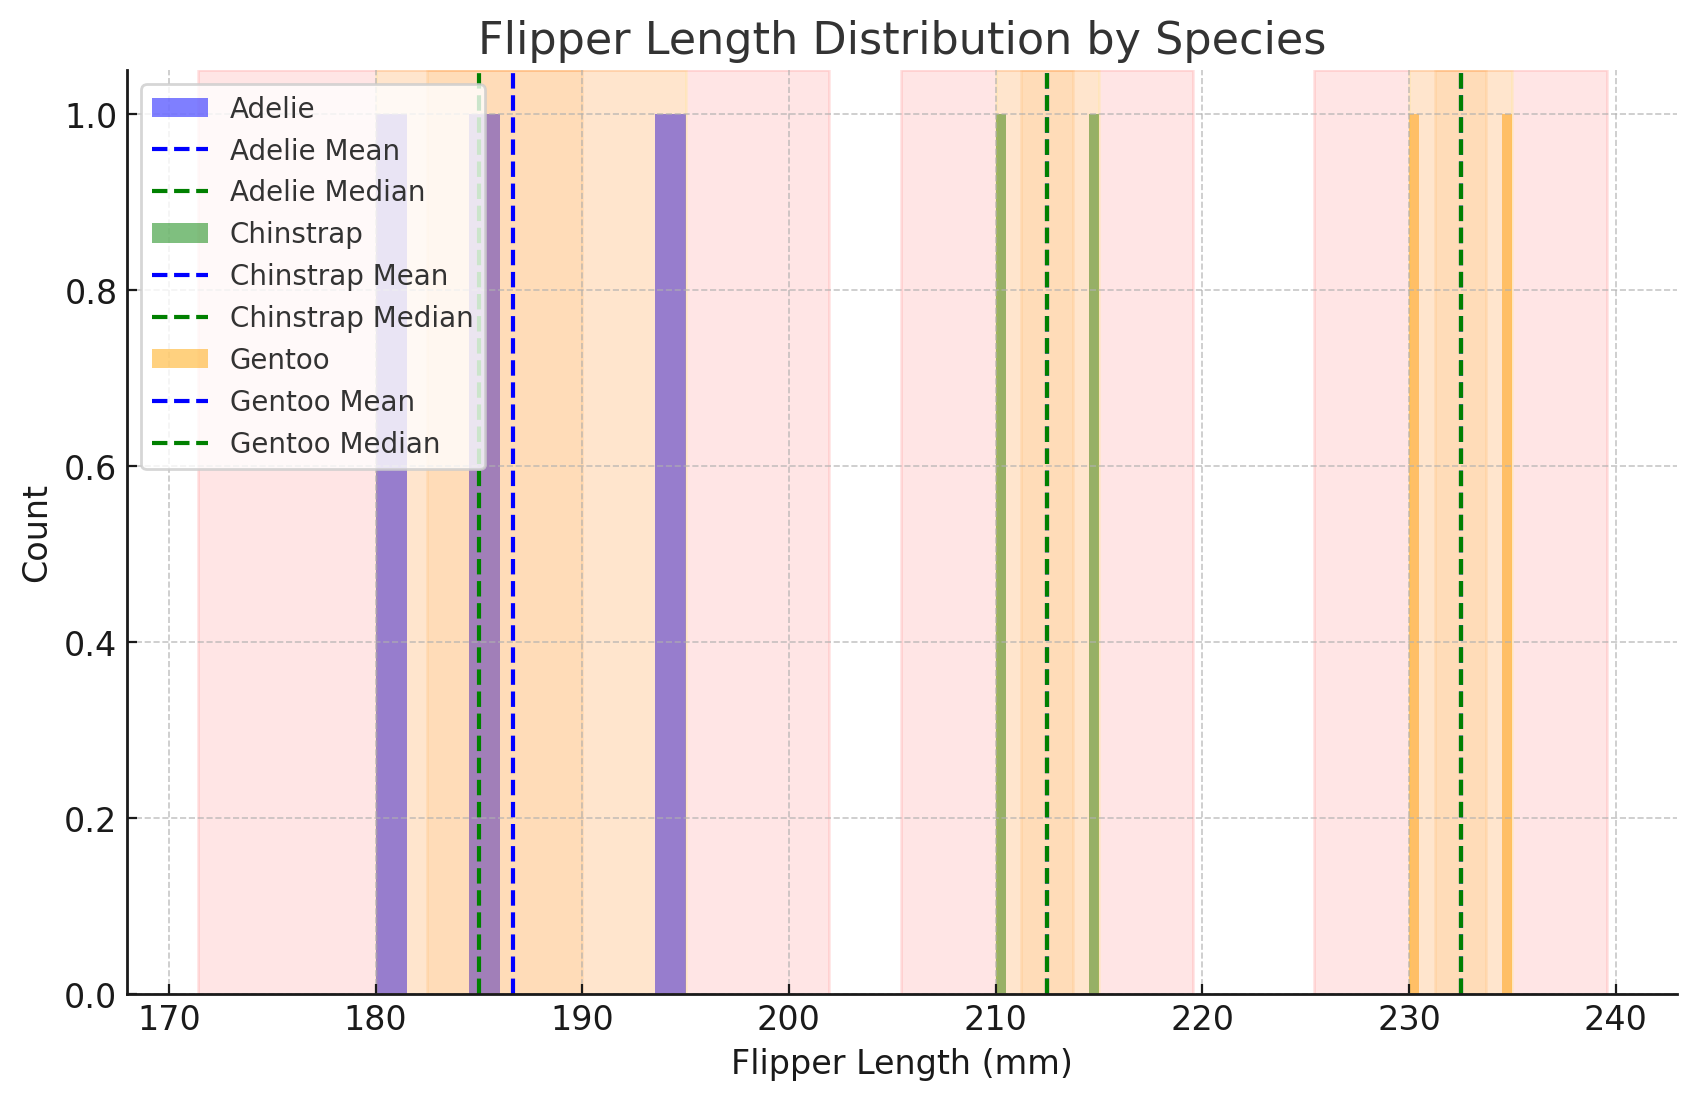

**summary:**

The plot shows histograms of the flipper lengths (in mm) for different penguin species. Key features marked on the plot include:

Vertical Lines for Central Tendencies:

Blue dashed line: Marks the mean flipper length for each species.
Green dashed line: Marks the median flipper length.
Shaded Regions for Distribution Scales:

Yellow region: Represents the full range (min to max) of flipper lengths.
Orange region: Indicates the interquartile range (IQR), showing where the middle 50% of the data lies.
Red region: Shows the range within two standard deviations from the mean, capturing a majority of the data points.

**link:**

https://chatgpt.com/c/66f5b578-b7b4-800d-ba96-3db2fd3bff19


---



2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots


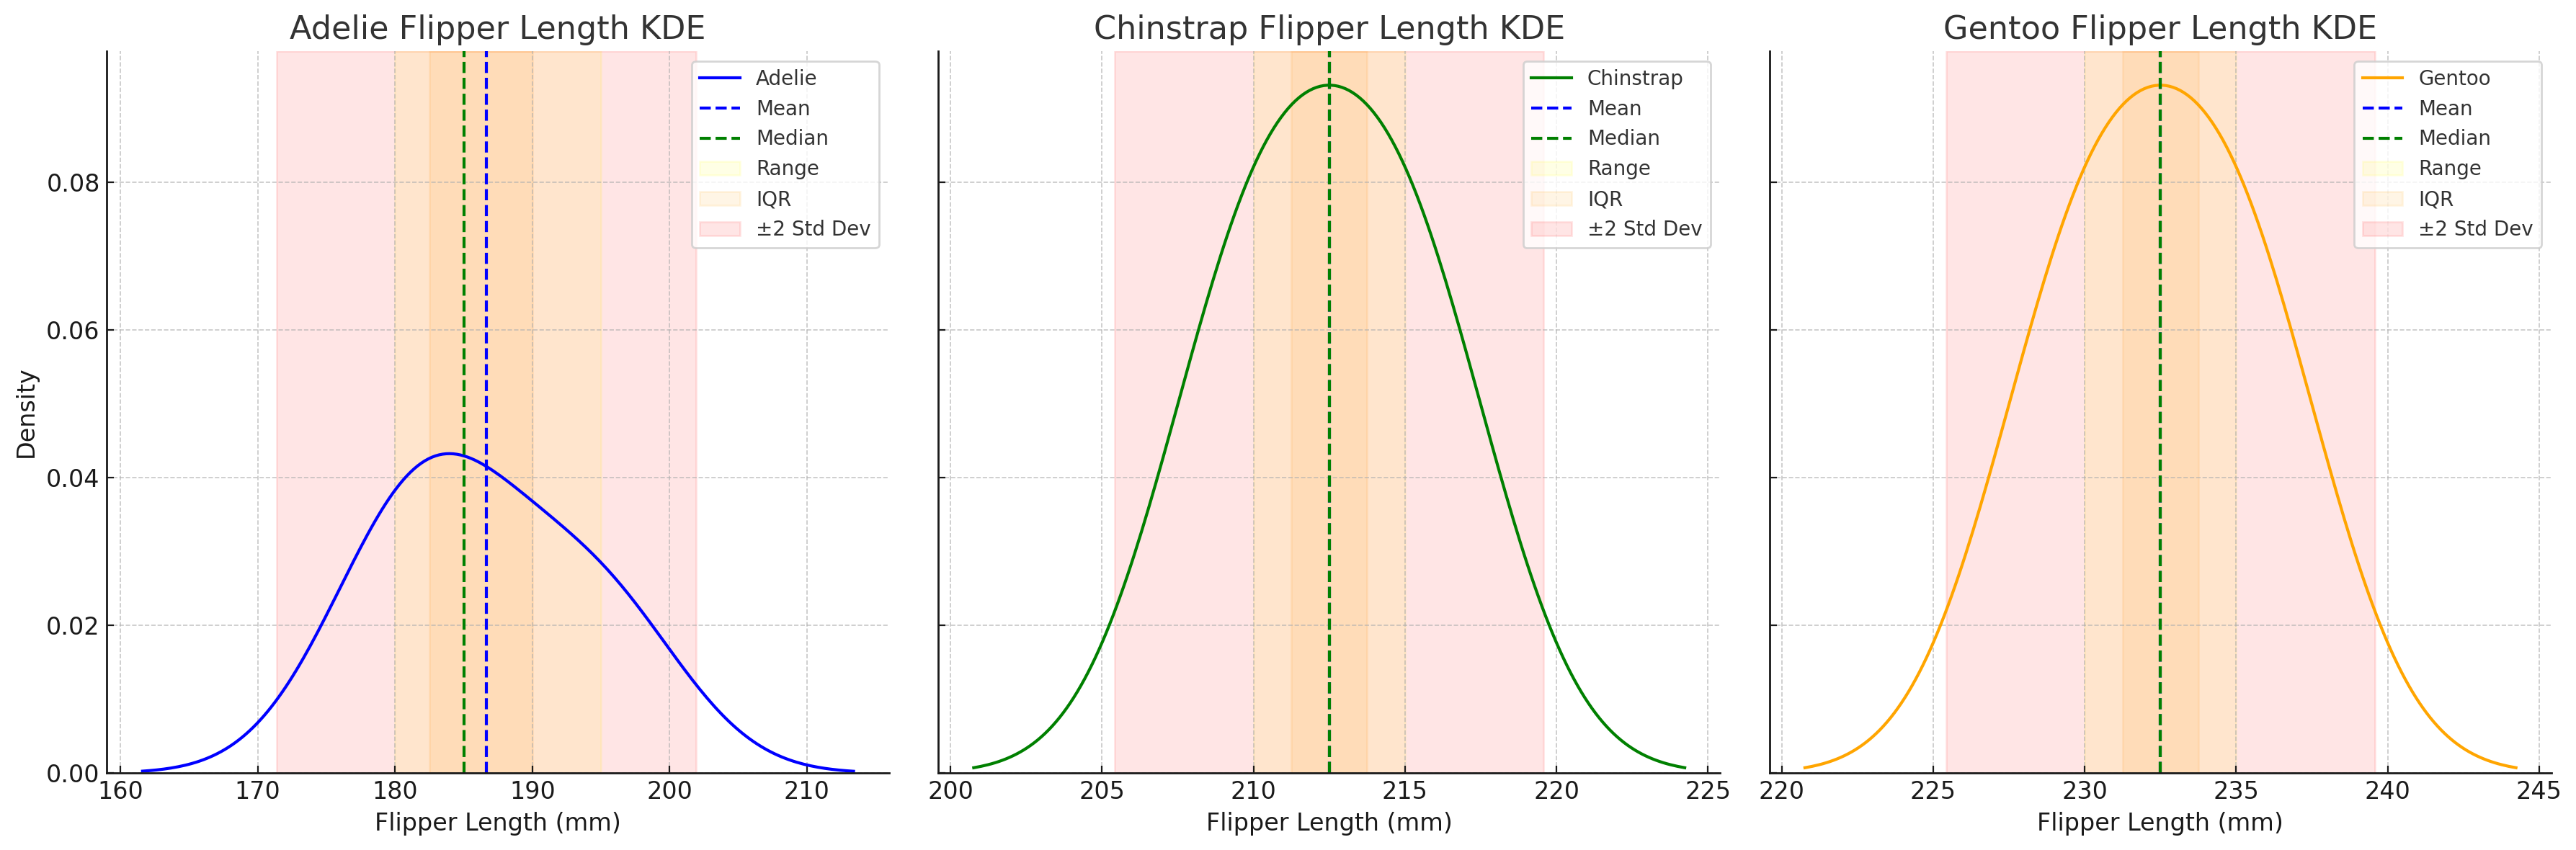

**summary:**

The visualizations consist of KDE plots for the flipper lengths of different penguin species, with additional markers to highlight key statistics:

KDE Curves: Each plot shows the density distribution of flipper lengths for one species (Adelie, Chinstrap, or Gentoo).

Vertical Lines:

Blue dashed line: Indicates the mean flipper length.

Green dashed line: Indicates the median flipper length.

Shaded Regions:

Yellow region: Represents the full range of flipper lengths for that species.

Orange region: Indicates the interquartile range (IQR), capturing the middle 50% of the data.

Red region: Shows the range that is within two standard deviations of the mean, highlighting the spread around the average.

These combined visual elements provide a clear overview of the distribution, central tendencies, and spread of flipper lengths across each penguin species.

**link:**

https://chatgpt.com/c/66f5b578-b7b4-800d-ba96-3db2fd3bff19


---



3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

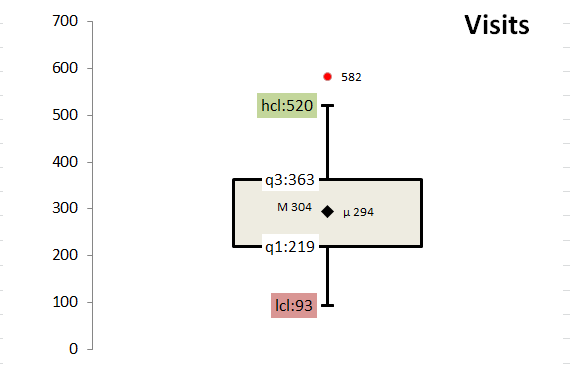

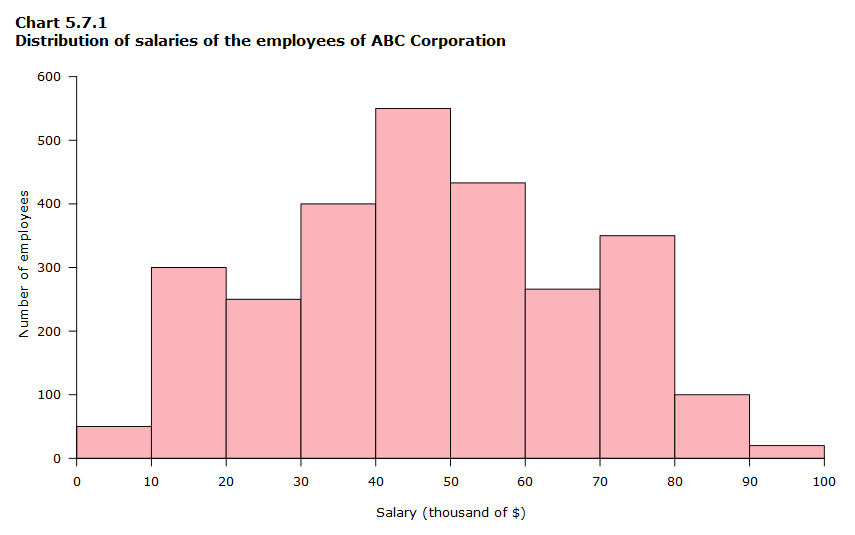

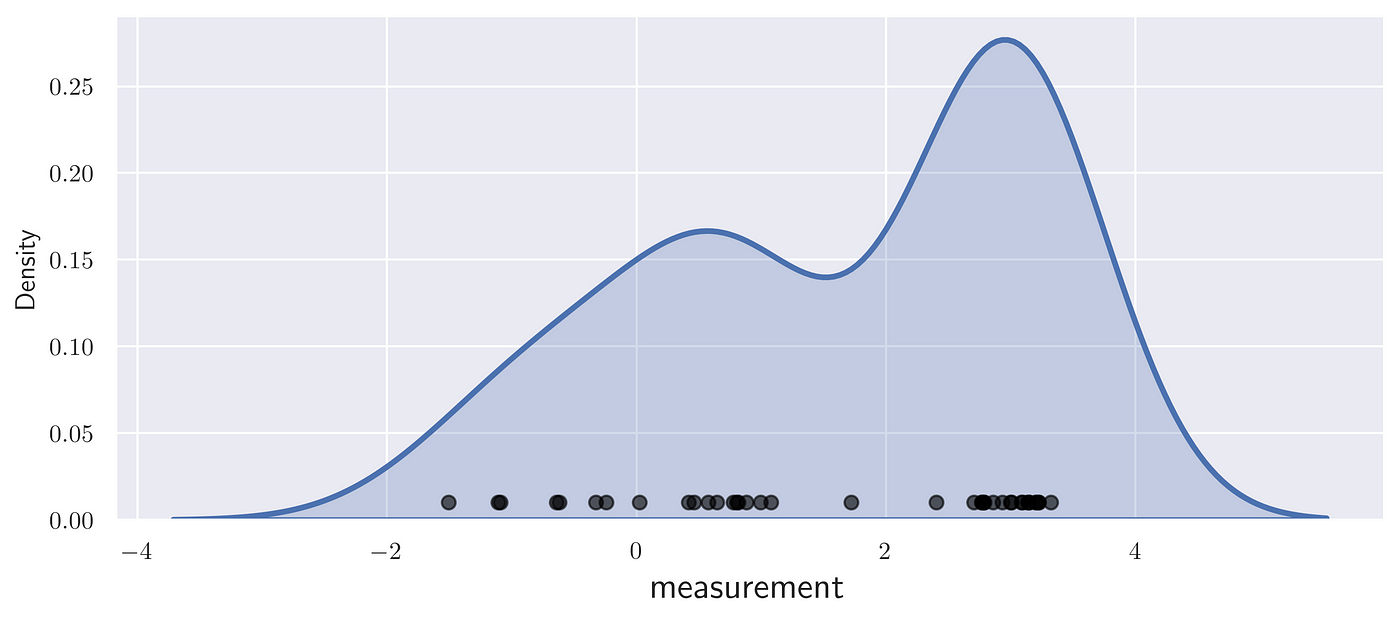

My descriptions:

Box Plot: Shows data distribution by quartiles, median, and potential outliers.
Stresses the key summary stats and outliers.

Histogram: Shows frequency distribution by grouping data into bins. Displays overall shape and spread.

KDE Plot: Shows a smoothed, continuous visualization of the distribution.

ChatBot:

Your original descriptions were quite close to these refinements and covered the primary aspects of each visualization effectively!

Pros and cons:

Box Plot

Pros: Quick summary; highlights outliers; good for comparisons.

Cons: Limited detail on shape; less effective for small datasets.

Histogram

Pros: Shows distribution shape and frequency; easy to understand.

Cons: Sensitive to bin size; can appear rough; hard to compare multiple sets.

KDE Plot

Pros: Smooth visualization; highlights distribution features.

Cons: Sensitive to bandwidth; less intuitive; potentially misleading for small datasets.

My preference:

KDE plot

Reason: It's easier to see multiple peaks and valleys in the data.

**Summary:**

You shared three visualizations (box plot, histogram, and KDE plot) and provided initial descriptions of their characteristics.

I refined those descriptions, focusing on their visual representation of data distribution, shape, and key statistics.

You then asked for a pros and cons list for each visualization method, and I provided detailed lists highlighting the advantages and disadvantages of box plots, histograms, and KDE plots.

Upon request, I condensed these into more brief bullet points for easier review.

**link:**

https://chatgpt.com/c/66f6133b-473c-800d-9b9a-3e3e35c5eeaa


---



4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

> 1 Which datasets have similar means and similar variances

> 2 Which datasets have similar means but quite different variances

> 3 Which datasets have similar variances but quite different means

> 4 Which datasets have quite different means and quite different variances





In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Means are close for A, B and C(all close to 5)

  A and C have similar variances (8.354 and 9.256).
  
  Therefore, A and C are the most similar in terms of both their means and variances.

2. Means are close for A, B and C(all close to 5)

   A has a variance of approximately 8.354.

   C has a variance of approximately 9.256.

   B has a much lower variance of approximately 2.285.

   Therefore, the pairs (A, B) and (B, C) have similar means but quite different variances.

3. The closest in variance are A and C (8.354 and 9.256), but their means are quite similar (5).

   Therefore, there are no datasets in this case that have both similar variances and quite different means.

4. D has a mean around 6 and a very low variance (0.257).

   A, B, and C have means around 5 but with significantly higher variances

   Thus, the datasets (A, D), (B, D), and (C, D) have both quite different means and quite different variances.


---










5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

In a right-skewed distribution, the mean is greater than the median because extreme high values pull the mean to the right. In a left-skewed distribution, the mean is less than the median as extreme low values pull the mean to the left. The mean is more sensitive to outliers, while the median is not.

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np

sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

The code is generating two samples from gamma distributions (one positively skewed and the other negatively skewed), calculating summary statistics, and visualizing the distribution.

sample1 is a right-skewed sample from a gamma distribution.

A histogram of sample1 is created for visualization.

The mean and median of sample1 are calculated to observe the effect of skewness on these measures.

sample2 is generated as a left-skewed distribution by negating the gamma distribution's samples.

This code is useful for understanding how different distributions (right-skewed and left-skewed) impact summary statistics like the mean and median, and how they can be visualized.

For a right-skewed distribution (positive skewness), the mean is larger than the median since the long tail on the right (higher values) makes the average upward.

For a left-skewed distribution (negative skewness), the mean is smaller than the median since the long tail on the left (lower values) makes the average downward.

Skewness happens because the data is not evenly spread out and has extreme values that affect the mean more than the median. The median is less affected by these extremes, making it a more stable measure of the center, while the mean changes more when there are very high or low values.

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
# Generate a right-skewed distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot histogram
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution")
fig1.show(renderer="png")

In [ ]:
# Calculate mean and median
mean1 = sample1.mean()
median1 = np.median(sample1)

# Display results
print(f"Right-Skewed Distribution - Mean: {mean1:.2f}, Median: {median1:.2f}")

Explanation: The right-skewed distribution will have a mean greater than the median due to the influence of the higher values in the long tail.

In [ ]:
# Generate a left-skewed distribution by negating the gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot histogram
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution")
fig2.show(renderer="png")

In [ ]:
# Calculate mean and median
mean2 = sample2.mean()
median2 = np.median(sample2)

# Display results
print(f"Left-Skewed Distribution - Mean: {mean2:.2f}, Median: {median2:.2f}")

Explanation: The left-skewed distribution will have a mean smaller than the median because of the influence of the lower values in the long tail.

In [ ]:
# Combine both distributions into a DataFrame
data = pd.DataFrame({'Right-Skewed': sample1, 'Left-Skewed': sample2})

# Plot histograms together for comparison
fig3 = px.histogram(data.melt(var_name="Distribution", value_name="Values"),
                    x="Values",
                    color="Distribution",
                    facet_col="Distribution",
                    title="Comparison of Right and Left Skewed Distributions",
                    marginal="box")
fig3.show(renderer="png")

Explanation: This visualization compares the right-skewed and left-skewed distributions side by side, helping to illustrate how the skewness affects the distribution shape, mean, and median.

In [ ]:
print("""
For a right-skewed distribution (positive skewness), the mean is larger than the median since the long tail on the right (higher values) makes the average upward.

For a left-skewed distribution (negative skewness), the mean is smaller than the median since the long tail on the left (lower values) makes the average downward.

Skewness happens because the data is not evenly spread out and has extreme values that affect the mean more than the median. The median is less affected by these extremes, making it a more stable measure of the center, while the mean changes more when there are very high or low values.
""")

**summary:**

We discussed how skewness affects the mean and median: in right-skewed distributions, the mean is greater than the median; in left-skewed distributions, the mean is less. You shared code that generates skewed distributions, calculates their mean and median, and visualizes them. I provided an extended sequence to clearly demonstrate and compare right and left-skewed distributions, highlighting the impact of extreme values on these measures.

**link:**

https://chatgpt.com/c/66f619e0-a034-800d-9ef0-ccf3785c0bf3


---



6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

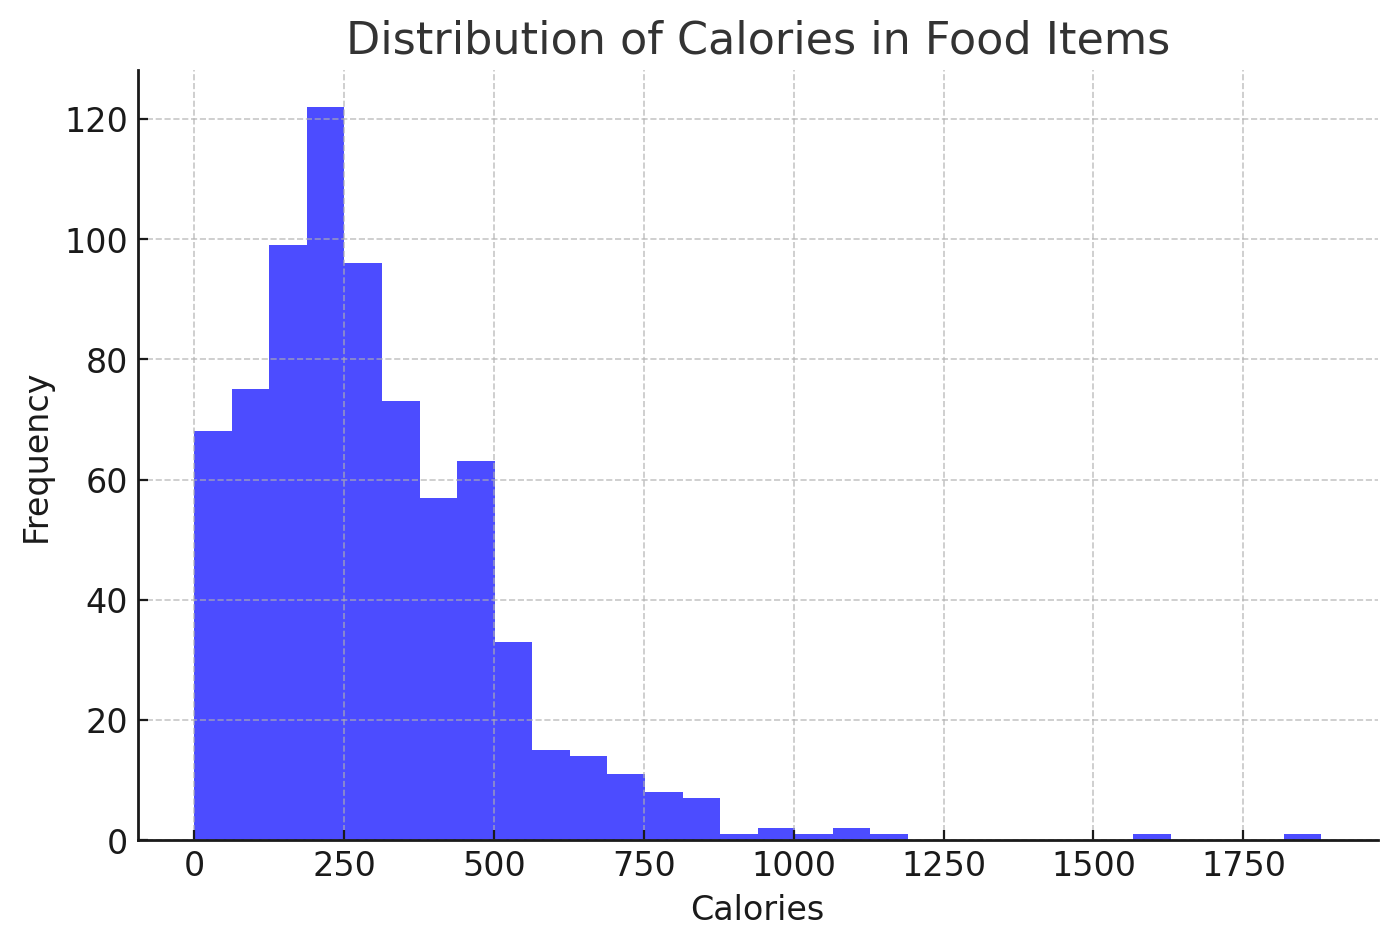

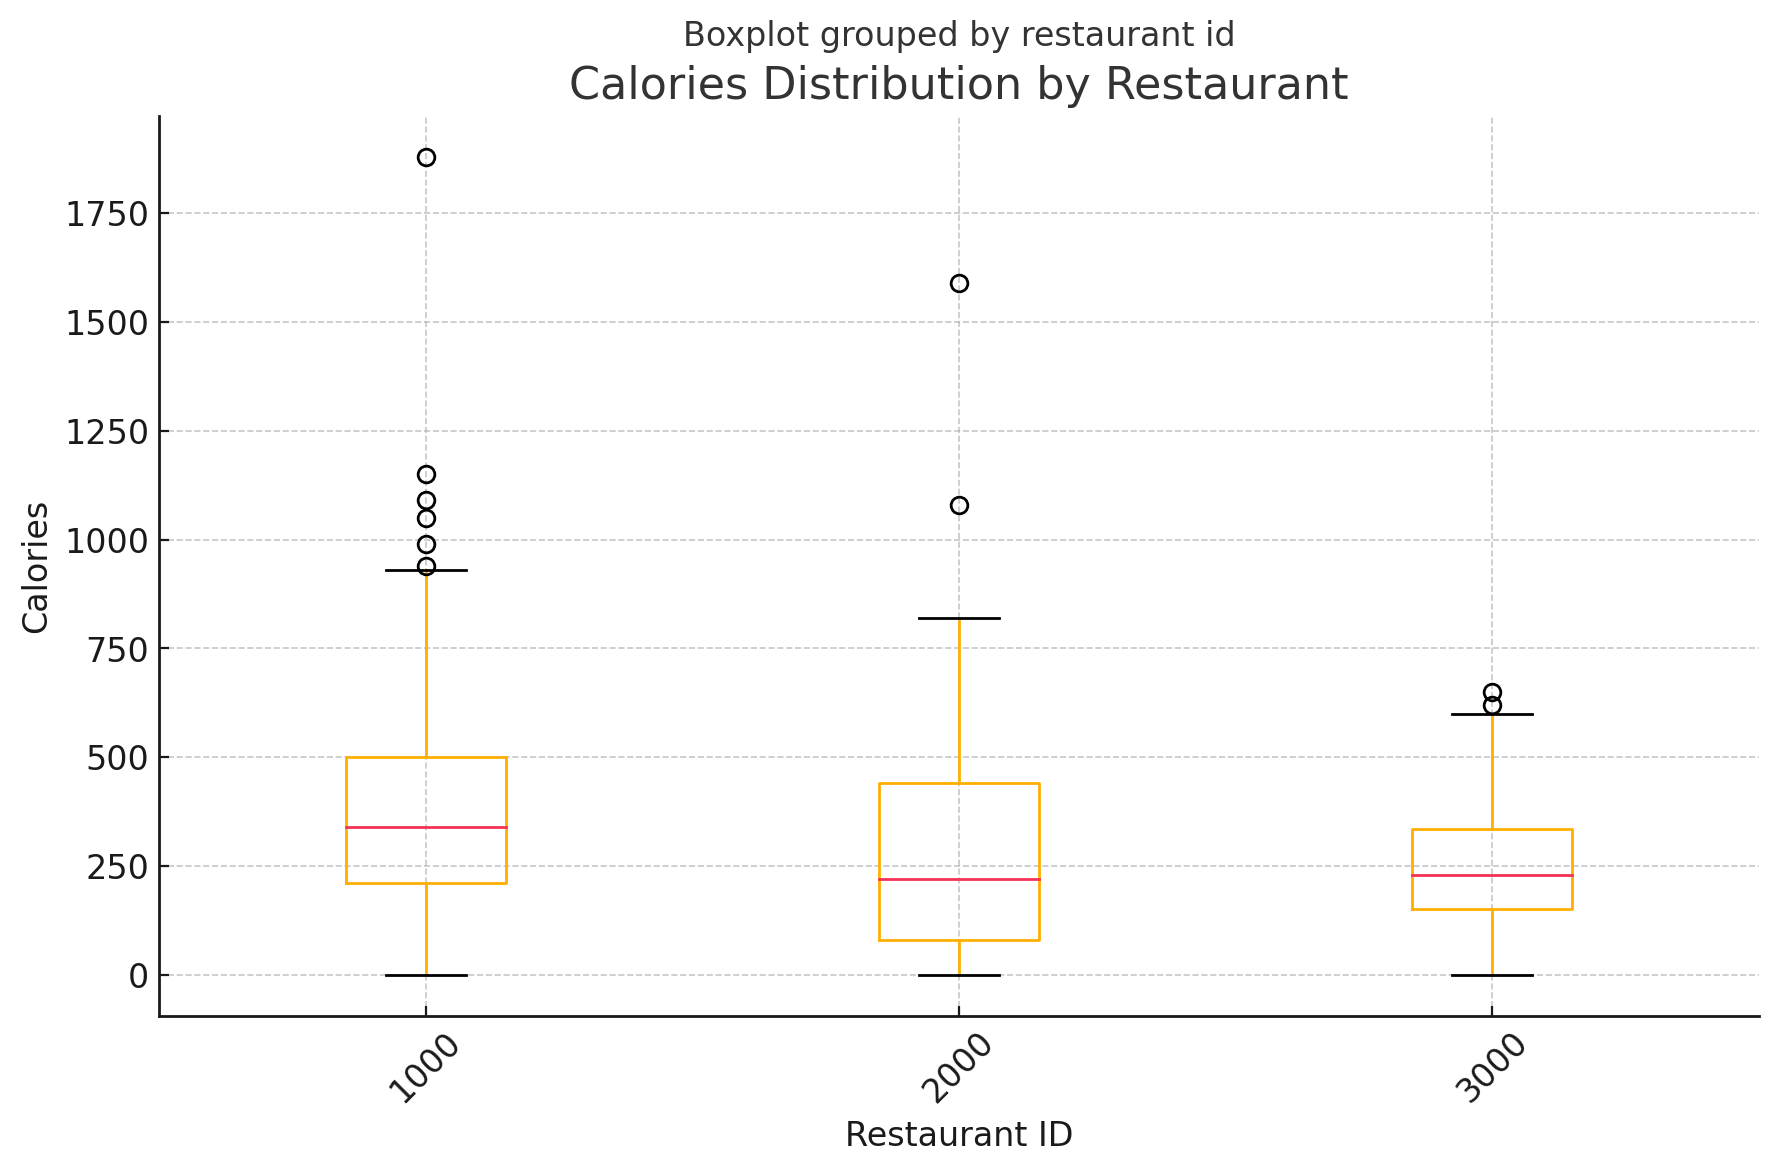

The dataset provides nutritional information for different fast-food items, including calories, fat content, carbohydrates, protein, and vitamin content, among other attributes. Here are a few highlights based on the summary statistics and visualizations:

Distribution of Calories: The histogram shows that the distribution of calories across food items is skewed, with a majority of items having lower calorie counts, but some items are significantly higher in calories.

Calories by Restaurant: The boxplot demonstrates variations in calorie content across different restaurants, suggesting that some restaurants tend to have higher-calorie items on average, while others are more moderate.

**summary:**

You imported a fast-food nutritional dataset and sought to understand its structure through summary statistics and visualizations. The summary statistics table highlighted key attributes like calories, fat, carbohydrates, protein, and vitamins. Visualizations included a histogram showing the distribution of calories (mostly skewed towards lower values) and a boxplot comparing calorie distributions across different restaurants. These analyses provided insights into the nutritional content and variations across different items and restaurants.

**link:**

https://chatgpt.com/c/66f61e98-29c0-800d-9b3f-57c00a1ba30a


---



7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

In [ ]:
import plotly.express as px

# Load an example dataset from Plotly which is similar to the visualization in the video
df = px.data.gapminder()

# Create an animated bubble chart similar to Hans Rosling's visualization
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=60,
    range_x=[100,100000],
    range_y=[20,90],
    title="Life Expectancy vs GDP per Capita Over Time"
)

# Improve the layout for clarity
fig.update_layout(
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy",
    showlegend=True
)

# Show the figure
fig.show()

**summary:**

You asked to watch Hans Rosling's video on "200 Countries, 200 Years, 4 Minutes" and then recreate a similar animated visualization using Plotly. I accessed the video and prepared Python code using Plotly to create an animated bubble chart showing the relationship between life expectancy, GDP per capita, and population over time (using the Gapminder dataset). However, there was an issue rendering the animation in this environment, so I provided instructions and code for you to execute the visualization locally on your machine.

**link:**

https://chatgpt.com/c/66f620a7-df6c-800d-9a5d-f09bcdc0bcbb


---



8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

In [ ]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent']
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by adding the sex suffix
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate rank within each year based on the percent column
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the data by name and year
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change from the previous year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Filter and sort the data
bn = bn.sort_values('year')
bn = bn[bn['percent'] > 0.001]  # Keep only "common" names

# Create the animated scatter plot
fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent",
    color="sex",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)

# Adjust y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Display the figure as a PNG image (for GitHub and MarkUs submissions)
fig.show(renderer="png")

**summary:**

You requested a modification to a Plotly scatter plot using baby name data from a CSV file. I adjusted the code to create an animated scatter plot with percent change as the x-axis, rank as the y-axis (reversed so rank 1 is at the top), size as the percent, color as sex, and animation over year. The dataset was processed to calculate rank and percentage change over time, and the plot was configured to be suitable for GitHub and MarkUs submissions by rendering as a PNG.

**link:**

https://chatgpt.com/c/66f620a7-df6c-800d-9a5d-f09bcdc0bcbb


---



9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.